# Example 1: Fitting a Gaussian
Lets start the tutorial on fitting the data-distribution and sampling from it with an example where we can parametrize the process explicitly and in which sampling is straightforward. One example of this is a Gaussian distribution. A 1-D Gaussian distribution has a probability distribution given by: $$p(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$$
where $\mu$ is the mean and $\sigma$ is the standard deviation. So to fit a Gaussian all we need to do is to estimate the mean and standard deviation.

We do so by using the Maximum Likelihood Estimation (MLE) method. The MLE method is a method of estimating the parameters of a statistical model given observations. It is a method that selects the parameters that maximize the likelihood of the observed data. In the case of a Gaussian distribution, the likelihood function of a set of data-points $\{x_i\}$ is given by: $$L(\mu, \sigma) = \prod_{i=1}^{N} p(x_i)$$
where $x_i$ are the observed data points. The log-likelihood function is given by: $$\log L(\mu, \sigma) = -\frac{N}{2}\log(2\pi) - N\log(\sigma) - \frac{1}{2\sigma^2}\sum_{i=1}^{N}(x_i-\mu)^2$$. Now we can find the values of $\mu$ and $\sigma$ that maximize the log-likelihood function by setting its partial derivatives $$\frac{\partial \log L}{\partial \mu} = 0$$ $$\frac{\partial \log L}{\partial \sigma} = 0$$

If we do out the math for this, the MLE estimates of the mean and standard deviation are given by: $$\mu_{MLE} = \frac{1}{N}\sum_{i=1}^{N}x_i$$ $$\sigma_{MLE} = \sqrt{\frac{1}{N}\sum_{i=1}^{N}(x_i-\mu_{MLE})^2}$$

## Generating a bunch of data
We'll create a data-set using Numpy.

Text(0.5, 1.0, 'Histogram of the generated data')

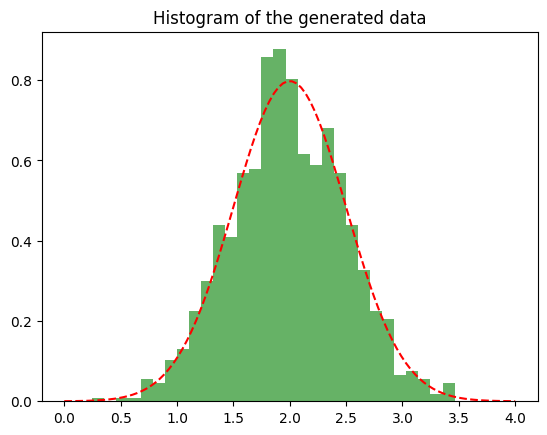

In [6]:
import numpy as np
import matplotlib.pyplot as plt

mean = 2.0
std = 0.5
n = 1000
data = np.random.normal(mean, std, n)

plt.hist(data, bins=30, density=True, alpha=0.6, color='g')
# also plot the true distribution
x = np.linspace(0, 4, 100)
y = 1/(std * np.sqrt(2 * np.pi)) * np.exp(-(x - mean)**2 / (2 * std**2))
plt.plot(x, y, 'r--')
plt.title('Histogram of the generated data')

1.9849657037409634 0.5081050690683644


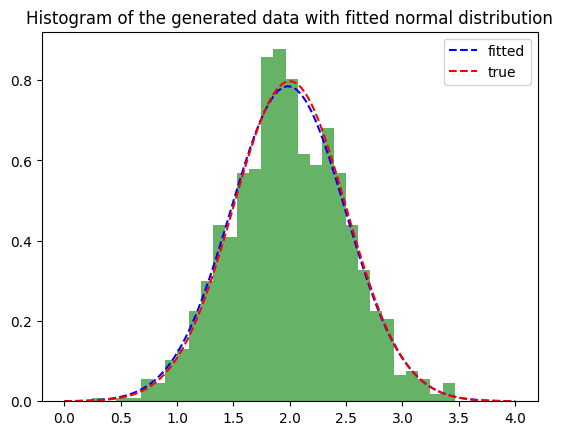

In [7]:
# Now lets fit a normal distribution to the data and plot it
fit_mean = np.mean(data)
fit_std = np.sqrt(np.sum((data - fit_mean)**2) / n)
print(fit_mean, fit_std)

# Now lets plot it over the histogram
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')
plt.plot(x, 1/(fit_std * np.sqrt(2 * np.pi)) * np.exp(-(x - fit_mean)**2 / (2 * fit_std**2)), 'b--', label='fitted')
plt.plot(x, y, 'r--', label='true')
plt.title('Histogram of the generated data with fitted normal distribution')
plt.legend()

## Fitting data for more complicated distributions - Normalizing Flows
This worked because we had a closed form expression for the probability distribution, allowing us to explicitly write out the log likelihood and solve for it. What happens if we have a more complicated distribution where we can't write out the log likelihood explicitly? We'll discuss normalizing flows, which let us transform a simple distribution into a more complicated one, and how we can use them to fit data.

### The basic case: 1D normalizing flows
Normalizing flows are a class of generative models that learn to transform a simple distribution into a more complicated one. The basic idea is to start with a simple distribution, like a Gaussian, and apply a series of invertible transformations to it to get the desired distribution. The key is that the transformations are invertible, so we can compute the probability density of the transformed distribution by applying the inverse transformations to the simple distribution. Lets pick an interesting looking invertible transformation and see how it lets us transform a 1D Gaussian into an immediately more interesting looking distribution.

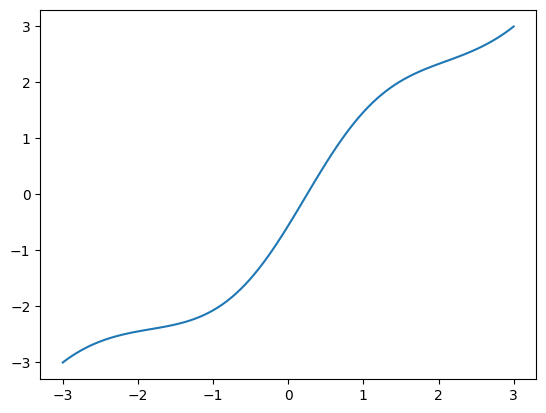

In [27]:
# Lets pick a wiggly function that is invertible over the entire domain of the Gaussian (-inf, inf) and that will create two modes in the histogram
def f(z):
    x1 = 6/(1+np.exp(-(z-0.25)*1.5))-3
    x2 = z
    p = z * z/9
    x = (1-p) * x1 + p * x2
    return x

x = np.linspace(-3, 3, 100)
plt.figure()
plt.plot(x, f(x))

(array([3.81636313e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 3.81636313e-04, 0.00000000e+00,
        0.00000000e+00, 3.81636313e-04, 0.00000000e+00, 0.00000000e+00,
        3.81636313e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        3.81636313e-04, 3.81636313e-04, 0.00000000e+00, 3.81636313e-04,
        3.81636313e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.81636313e-04,
        3.81636313e-04, 3.81636313e-04, 7.63272627e-04, 3.81636313e-04,
        1.14490894e-03, 1.90818157e-03, 7.63272627e-04, 1.14490894e-03,
        1.90818157e-03, 1.14490894e-03, 1.14490894e-03, 2.28981788e-03,
        1.90818157e-03, 4.57963576e-03, 3.81636313e-03, 4.19799945e-03,
        9.54090783e-03, 5.72454470e-03, 1.10674531e-02, 1.48838162e-02,
        1.67919978e-02, 2.40430877e-02, 4.00718129e-02, 6.869453

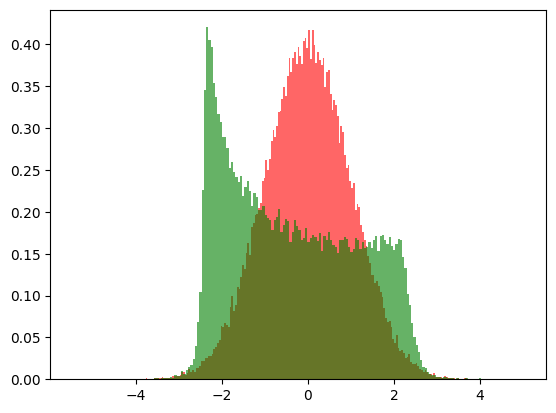

In [31]:
# Now pass samples from a Gaussian distribution through
mean = 0.0
std = 1.0
n = 50000
data = np.random.normal(mean, std, n)
transformed_data = f(data)

plt.figure()
plt.hist(data, bins=200, density=True, alpha=0.6, color='r')
plt.hist(transformed_data, bins=200, density=True, alpha=0.6, color='g')